In [1]:
!pip install --upgrade scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import pandas as pd

## If parquet reading from pandas is not working try install pyarrow
## !pip install pyarrow

In [3]:
pd.__version__

'2.2.3'

In [4]:
## Reading Data of 2024 January Yellow Taxi Data
# df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')

In [5]:
## Reading Data of 2023 January Yellow Taxi Data
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [6]:
## Looking first 5 rows from the dataset
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [7]:
## Looking all the rows x cols in dataset
## Number - 1

rows, cols = df.shape
print(f"Rows: {rows}")
print(f"The answer for No.1 is : {cols}")

Rows: 3066766
The answer for No.1 is : 19


In [8]:
## Checking if answers is in describe()
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.066766e+06,3066766,3066766,2.995023e+06,3.066766e+06,2.995023e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,2.995023e+06,2.995023e+06
mean,1.730215e+00,2023-01-17 00:22:26.288164,2023-01-17 00:38:06.427874,1.362532e+00,3.847342e+00,1.497440e+00,1.663980e+02,1.643926e+02,1.194483e+00,1.836707e+01,1.537842e+00,4.882900e-01,3.367941e+00,5.184907e-01,9.820847e-01,2.702038e+01,2.274231e+00,1.074086e-01
min,1.000000e+00,2008-12-31 23:01:42,2009-01-01 14:29:11,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2023-01-09 16:21:57.250000,2023-01-09 16:37:06,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.540000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-01-17 08:42:29.500000,2023-01-17 08:58:30.500000,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-01-24 16:26:27,2023-01-24 16:42:49,1.000000e+00,3.330000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.870000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2023-02-01 00:56:53,2023-02-02 09:28:47,9.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00
std,4.438480e-01,NaN,NaN,8.961200e-01,2.495838e+02,6.474767e+00,6.424413e+01,6.994368e+01,5.294762e-01,1.780782e+01,1.789592e+00,1.034641e-01,3.826759e+00,2.017579e+00,1.833529e-01,2.216359e+01,7.718454e-01,3.556511e-01


In [9]:
## Exploring Pickup Time
df['tpep_pickup_datetime']

0         2023-01-01 00:32:10
1         2023-01-01 00:55:08
2         2023-01-01 00:25:04
3         2023-01-01 00:03:48
4         2023-01-01 00:10:29
                  ...        
3066761   2023-01-31 23:58:34
3066762   2023-01-31 23:31:09
3066763   2023-01-31 23:01:05
3066764   2023-01-31 23:40:00
3066765   2023-01-31 23:07:32
Name: tpep_pickup_datetime, Length: 3066766, dtype: datetime64[us]

In [10]:
# Exploring Drop Off Time
df['tpep_dropoff_datetime']

0         2023-01-01 00:40:36
1         2023-01-01 01:01:27
2         2023-01-01 00:37:49
3         2023-01-01 00:13:25
4         2023-01-01 00:21:19
                  ...        
3066761   2023-02-01 00:12:33
3066762   2023-01-31 23:50:36
3066763   2023-01-31 23:25:36
3066764   2023-01-31 23:53:00
3066765   2023-01-31 23:21:56
Name: tpep_dropoff_datetime, Length: 3066766, dtype: datetime64[us]

In [11]:
# Changing into accountable version
# Number 2
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [12]:
df['tpep_pickup_datetime']

0         2023-01-01 00:32:10
1         2023-01-01 00:55:08
2         2023-01-01 00:25:04
3         2023-01-01 00:03:48
4         2023-01-01 00:10:29
                  ...        
3066761   2023-01-31 23:58:34
3066762   2023-01-31 23:31:09
3066763   2023-01-31 23:01:05
3066764   2023-01-31 23:40:00
3066765   2023-01-31 23:07:32
Name: tpep_pickup_datetime, Length: 3066766, dtype: datetime64[us]

In [13]:
# To get the resulting minutes by switching timedelta into float

df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [14]:
# Find Standard Deviation

std = df['duration'].std()
print(f'{std:.2f}') # or
#print(round(std, 2))

42.59


In [15]:
print(f"The answer for No.2 is : {std:.2f}")

The answer for No.2 is : 42.59


In [16]:
df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]

In [17]:
# Checking the dataset
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [18]:
preRows = rows
newRows = df.shape[0]

In [19]:
print(f'Actual Rows: {preRows}')
print(f'New Rows: {newRows}')

Actual Rows: 3066766
New Rows: 3009173


In [20]:
# Number 3
# To find the fraction

fraction = newRows / preRows
print(f"Total Fraction: {(fraction*100):.0f}%")

Total Fraction: 98%


In [21]:
print(f"The answer for No.3 is : {(fraction*100):.0f}%")

The answer for No.3 is : 98%


In [22]:
## Number 5

# Keep only for 2 features
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(int).astype(str)
df[numerical] = df[numerical].astype(int).astype(str)

In [23]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [24]:
from sklearn.feature_extraction import DictVectorizer

## Getting Features
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [25]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9027519 stored elements and shape (3009173, 636)>

In [26]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',

In [27]:
rows, cols = X_train.shape

In [28]:
print(f"The answer for No.4 is: {cols} columns")

The answer for No.4 is: 636 columns


In [29]:
# Getting labels
target = 'duration'
y_train = df[target].values

In [30]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ], shape=(3009173,))

In [31]:
# Modeling
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(X_train)

/tmp/ipykernel_91828/1536836110.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_91828/1536836110.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

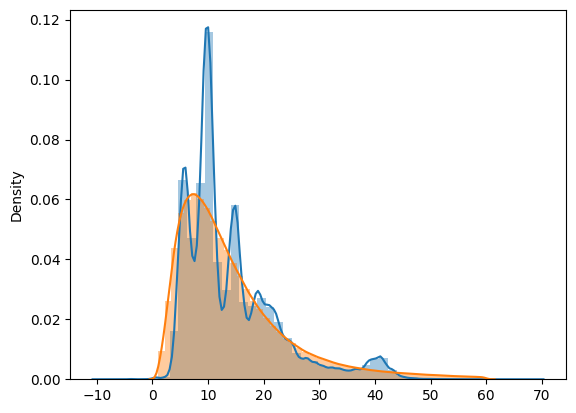

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')
plt.legend

In [35]:
# Evaluation 
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

In [36]:
rmse
print(f"The answer for No.5 is: {rmse}")

The answer for No.5 is: 5.072970629021692


In [4]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

    df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(int).astype(str)

    return df

In [5]:
df_train = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_val = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [6]:
len(df_train)

3066766

In [7]:
len(df_val)

2913955

In [12]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Keep only for 2 features
categorical = ['PULocationID', 'DOLocationID']

df_train[categorical] = df_train[categorical].astype(int).astype(str)
df_val[categorical] = df_val[categorical].astype(int).astype(str)


## Getting Features
dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

# Getting labels
target = 'duration'
y_val = df_val[target].values
y_train = df_train[target].values

In [13]:
X_val.shape[1]

518

In [ ]:
X_train

In [ ]:
# Modeling
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
# Prediciton
y_pred = lr.predict(X_val)

# Evaluation
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(mse)
print(rmse)